In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # For linear regression

In [2]:
# Load the datasets
demographics = pd.read_csv('Assignment02_dataset/dataset1.csv')  # Demographics data
screen_time = pd.read_csv('Assignment02_dataset/dataset2.csv')  # Screen time data
well_being = pd.read_csv('Assignment02_dataset/dataset3.csv')  # Well-being data

In [3]:
# Merge datasets on ID
merged_data = demographics.merge(screen_time, on='ID').merge(well_being, on='ID')

In [4]:
# Check for missing values
print("Missing values in the dataset:")
print(merged_data.isnull().sum())

Missing values in the dataset:
ID          0
gender      0
minority    0
deprived    0
C_we        0
C_wk        0
G_we        0
G_wk        0
S_we        0
S_wk        0
T_we        0
T_wk        0
Optm        0
Usef        0
Relx        0
Intp        0
Engs        0
Dealpr      0
Thcklr      0
Goodme      0
Clsep       0
Conf        0
Mkmind      0
Loved       0
Intthg      0
Cheer       0
dtype: int64


In [5]:
# Rename the columns for better readability
merged_data = merged_data.rename(columns={
    'C_we': 'Computer_Weekends',
    'C_wk': 'Computer_Weekdays',
    'G_we': 'Gaming_Weekends',
    'G_wk': 'Gaming_Weekdays',
    'S_we': 'Smartphone_Weekends',
    'S_wk': 'Smartphone_Weekdays',
    'T_we': 'TV_Weekends',
    'T_wk': 'TV_Weekdays',
    'gender': 'Gender',
    'minority': 'Minority_Status',
    'deprived': 'Deprivation_Status',
    'Optm': 'Optimistic',
    'Usef': 'Feeling_Useful',
    'Relx': 'Feeling_Relaxed',
    'Intp': 'Interested_in_People',
    'Engs': 'Energy_to_Spare',
    'Dealpr': 'Dealing_with_Problems',
    'Thkclr': 'Thinking_Clearly',
    'Goodme': 'Feeling_Good_about_Myself',
    'Clsep': 'Feeling_Close_to_Others',
    'Conf': 'Feeling_Confident',
    'Mkmind': 'Making_My_Own_Mind',
    'Loved': 'Feeling_Loved',
    'Intthg': 'Interested_in_New_Things',
    'Cheer': 'Feeling_Cheerful'
})

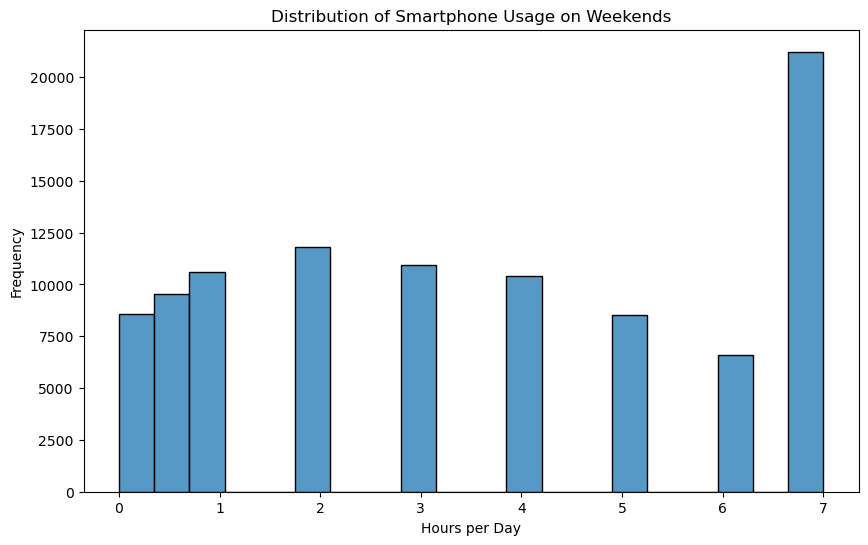

In [6]:
# Investigation 1: Histogram for Smartphone Usage on Weekends
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_data, x='Smartphone_Weekends', bins=20)
plt.title('Distribution of Smartphone Usage on Weekends')
plt.xlabel('Hours per Day')
plt.ylabel('Frequency')
plt.show()

In [7]:
# Check correlation between Computer Usage and Feeling Confident
corr1 = merged_data['Computer_Weekdays'].corr(merged_data['Feeling_Confident'])
print(f'Correlation between Computer Usage (Weekdays) and Feeling Confident: {corr1}')

Correlation between Computer Usage (Weekdays) and Feeling Confident: -0.05620981727909269


In [8]:
D# Investigation 2: Linear Regression for Computer Usage (Weekdays) vs. Feeling Confident
X1 = merged_data[['Computer_Weekdays']]  # Independent variable
y1 = merged_data['Feeling_Confident']    # Dependent variable

In [9]:
X1 = sm.add_constant(X1)  # Add a constant to the model
model1 = sm.OLS(y1, X1).fit()  # Fit the linear regression model
print("Linear Regression Results for Computer Usage vs. Feeling Confident:")
print(model1.summary())  # Display regression results

Linear Regression Results for Computer Usage vs. Feeling Confident:
                            OLS Regression Results                            
Dep. Variable:      Feeling_Confident   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     311.5
Date:                Wed, 16 Oct 2024   Prob (F-statistic):           1.32e-69
Time:                        16:16:49   Log-Likelihood:            -1.5003e+05
No. Observations:               98278   AIC:                         3.001e+05
Df Residuals:                   98276   BIC:                         3.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

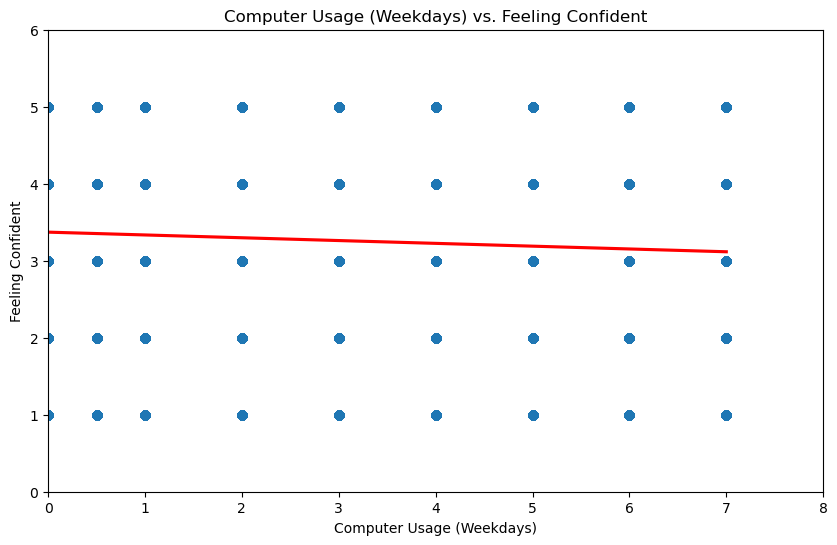

In [10]:
# Plot the regression line for Computer Usage vs. Feeling Confident with adjusted limits
plt.figure(figsize=(10, 6))
sns.regplot(x='Computer_Weekdays', y='Feeling_Confident', data=merged_data, ci=None, line_kws={"color": "red"})
plt.title('Computer Usage (Weekdays) vs. Feeling Confident')
plt.xlabel('Computer Usage (Weekdays)')
plt.ylabel('Feeling Confident')
plt.xlim(0, merged_data['Computer_Weekdays'].max() + 1)  # Adjust x-axis limit
plt.ylim(0, merged_data['Feeling_Confident'].max() + 1)  # Adjust y-axis limit
plt.show()

In [11]:
# Check correlation between TV Usage and Feeling Good about Myself
corr2 = merged_data['TV_Weekdays'].corr(merged_data['Feeling_Good_about_Myself'])
print(f'Correlation between TV Usage (Weekdays) and Feeling Good about Myself: {corr2}')

Correlation between TV Usage (Weekdays) and Feeling Good about Myself: -0.07654548393016072


In [12]:
# Investigation 3: Linear Regression for TV Usage (Weekdays) vs. Feeling Good about Myself
X2 = merged_data[['TV_Weekdays']]  # Independent variable
y2 = merged_data['Feeling_Good_about_Myself']  # Dependent variable

In [13]:
X2 = sm.add_constant(X2)  # Add a constant to the model
model2 = sm.OLS(y2, X2).fit()  # Fit the linear regression model
print("Linear Regression Results for TV Usage vs. Feeling Good about Myself:")
print(model2.summary())  # Display regression results

Linear Regression Results for TV Usage vs. Feeling Good about Myself:
                                OLS Regression Results                               
Dep. Variable:     Feeling_Good_about_Myself   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                  0.006
Method:                        Least Squares   F-statistic:                     579.2
Date:                       Wed, 16 Oct 2024   Prob (F-statistic):          1.31e-127
Time:                               16:16:49   Log-Likelihood:            -1.5076e+05
No. Observations:                      98278   AIC:                         3.015e+05
Df Residuals:                          98276   BIC:                         3.015e+05
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                  coef    std err          t      P>|t|      [0.025   

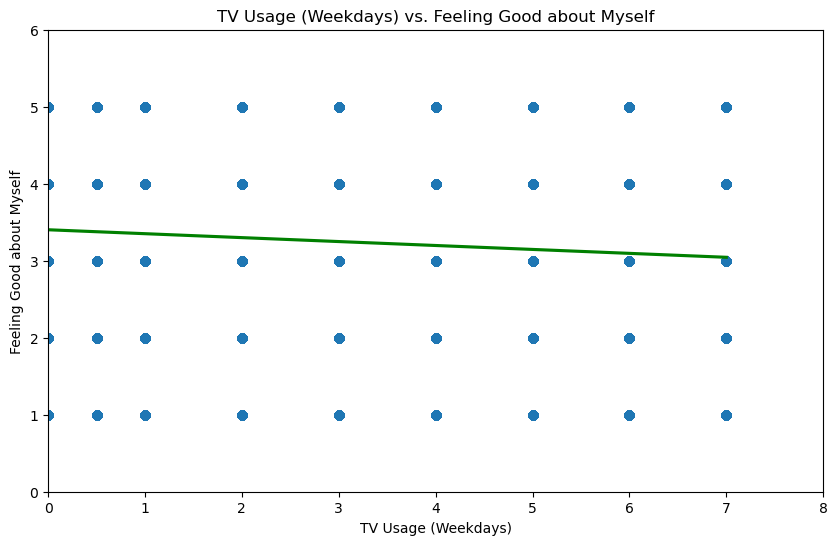

In [14]:
# Plot the regression line for TV Usage vs. Feeling Good about Myself with adjusted limits
plt.figure(figsize=(10, 6))
sns.regplot(x='TV_Weekdays', y='Feeling_Good_about_Myself', data=merged_data, ci=None, line_kws={"color": "green"})
plt.title('TV Usage (Weekdays) vs. Feeling Good about Myself')
plt.xlabel('TV Usage (Weekdays)')
plt.ylabel('Feeling Good about Myself')
plt.xlim(0, merged_data['TV_Weekdays'].max() + 1)  # Adjust x-axis limit
plt.ylim(0, merged_data['Feeling_Good_about_Myself'].max() + 1)  # Adjust y-axis limit
plt.show()

C:\Users\itsme\AppData\Local\Temp\ipykernel_14388\2315367058.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deprivation_Status', y='Smartphone_Weekends', data=merged_data, palette="Set2")


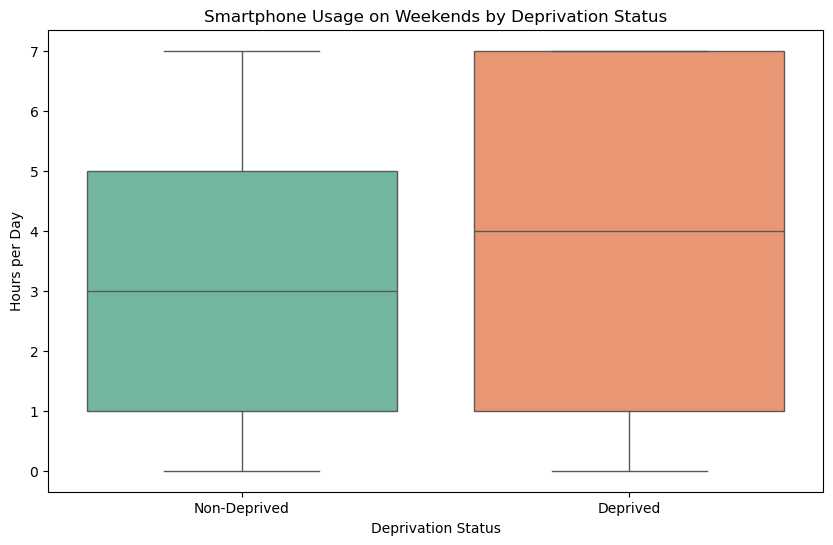

In [15]:
# Investigation 4: Box Plot for Smartphone Usage across Deprivation Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Deprivation_Status', y='Smartphone_Weekends', data=merged_data, palette="Set2")
plt.title('Smartphone Usage on Weekends by Deprivation Status')
plt.xlabel('Deprivation Status')
plt.ylabel('Hours per Day')
plt.xticks([0, 1], ['Non-Deprived', 'Deprived'])  # Rename x-axis ticks
plt.show()

In [16]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [17]:
# Merge datasets on 'ID'
data = pd.merge(pd.merge(demographics, screen_time, on='ID'), well_being, on='ID')

In [18]:
# Print column names to identify any discrepancies
print("Columns in the dataset:")
print(data.columns)

Columns in the dataset:
Index(['ID', 'gender', 'minority', 'deprived', 'C_we', 'C_wk', 'G_we', 'G_wk',
       'S_we', 'S_wk', 'T_we', 'T_wk', 'Optm', 'Usef', 'Relx', 'Intp', 'Engs',
       'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved',
       'Intthg', 'Cheer'],
      dtype='object')


In [19]:
# Calculate total screen time by summing all screen time variables (weekdays and weekends for computers, video games, smartphones, TV)
data['total_screen_time'] = data[['C_we', 'C_wk',
                                    'G_we', 'G_wk',
                                    'S_we', 'S_wk',
                                    'T_we', 'T_wk']].sum(axis=1)

In [20]:
# Well-being columns based on dataset
well_being_columns = ['Optm', 'Relx', 'Intp', 'Engs', 'Dealpr',
                      'Thkclr', 'Goodme', 'Clsep', 'Conf',
                      'Mkmind', 'Loved', 'Intthg', 'Cheer']

In [21]:
# Check if well-being columns exist in the dataset
existing_columns = [col for col in well_being_columns if col in data.columns]

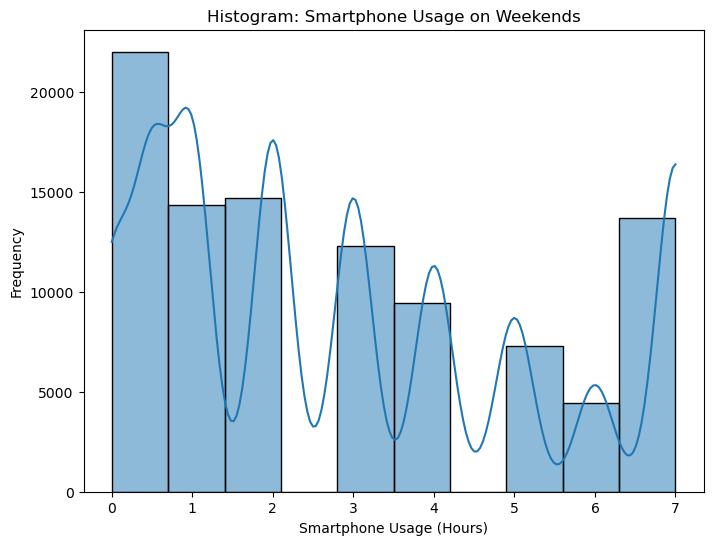

In [22]:
# 1. Histogram for Smartphone Usage on Weekends
plt.figure(figsize=(8, 6))
sns.histplot(data['S_wk'], bins=10, kde=True)
plt.title('Histogram: Smartphone Usage on Weekends')
plt.xlabel('Smartphone Usage (Hours)')
plt.ylabel('Frequency')
plt.show()

C:\Users\itsme\AppData\Local\Temp\ipykernel_14388\224966277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Smartphone_Weekdays', data=merged_data, palette="Set1")


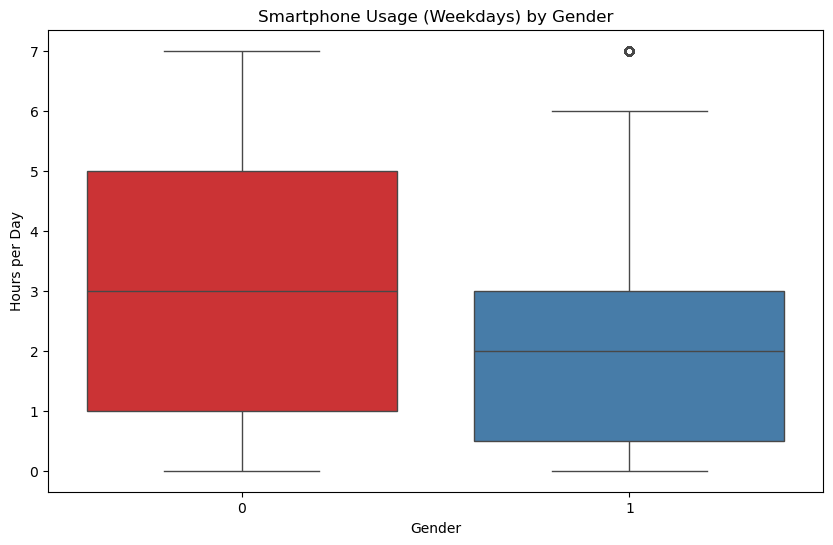

In [38]:
# Boxplot for screen time by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Smartphone_Weekdays', data=merged_data, palette="Set1")
plt.title('Smartphone Usage (Weekdays) by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours per Day')
plt.show()

In [39]:
# T-test to check if the difference in smartphone usage between genders is significant
from scipy.stats import ttest_ind

# Separate data into male and female groups
male_usage = merged_data[merged_data['Gender'] == 'Male']['Smartphone_Weekdays']
female_usage = merged_data[merged_data['Gender'] == 'Female']['Smartphone_Weekdays']

In [40]:
# Perform t-test
t_stat, p_val = ttest_ind(male_usage, female_usage, nan_policy='omit')
print(f"T-test for difference in smartphone usage (weekdays) between genders: T-stat={t_stat}, P-value={p_val}")

T-test for difference in smartphone usage (weekdays) between genders: T-stat=nan, P-value=nan


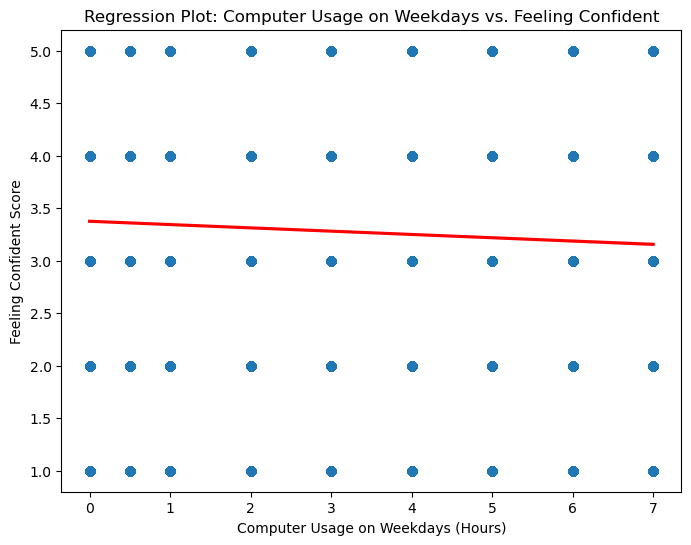

In [23]:
# 2. Linear Regression Plot for Computer Usage on Weekdays vs. Feeling Confident
plt.figure(figsize=(8, 6))
sns.regplot(x='C_we', y='Conf', data=data, line_kws={"color": "red"})
plt.title('Regression Plot: Computer Usage on Weekdays vs. Feeling Confident')
plt.xlabel('Computer Usage on Weekdays (Hours)')
plt.ylabel('Feeling Confident Score')
plt.show()

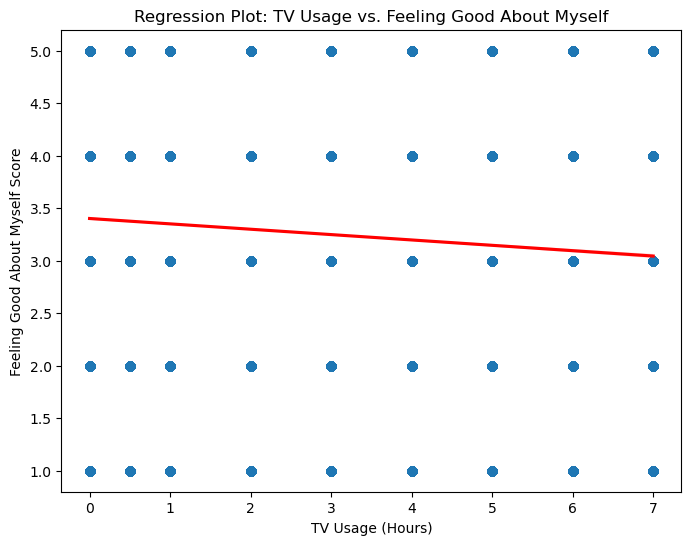

In [24]:
# 3. Linear Regression Plot for TV Usage vs. Feeling Good About Myself
plt.figure(figsize=(8, 6))
sns.regplot(x='T_wk', y='Goodme', data=data, line_kws={"color": "red"})
plt.title('Regression Plot: TV Usage vs. Feeling Good About Myself')
plt.xlabel('TV Usage (Hours)')
plt.ylabel('Feeling Good About Myself Score')
plt.show()

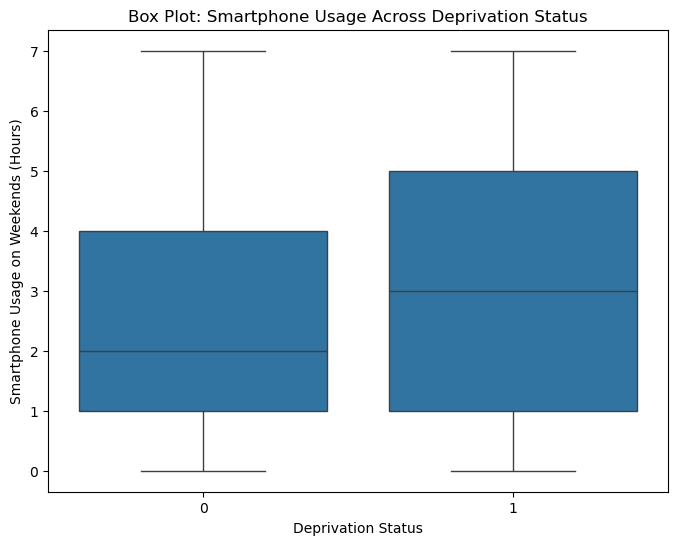

In [25]:
# 4. Box Plot for Smartphone Usage Across Deprivation Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='deprived', y='S_wk', data=data)
plt.title('Box Plot: Smartphone Usage Across Deprivation Status')
plt.xlabel('Deprivation Status')
plt.ylabel('Smartphone Usage on Weekends (Hours)')
plt.show()

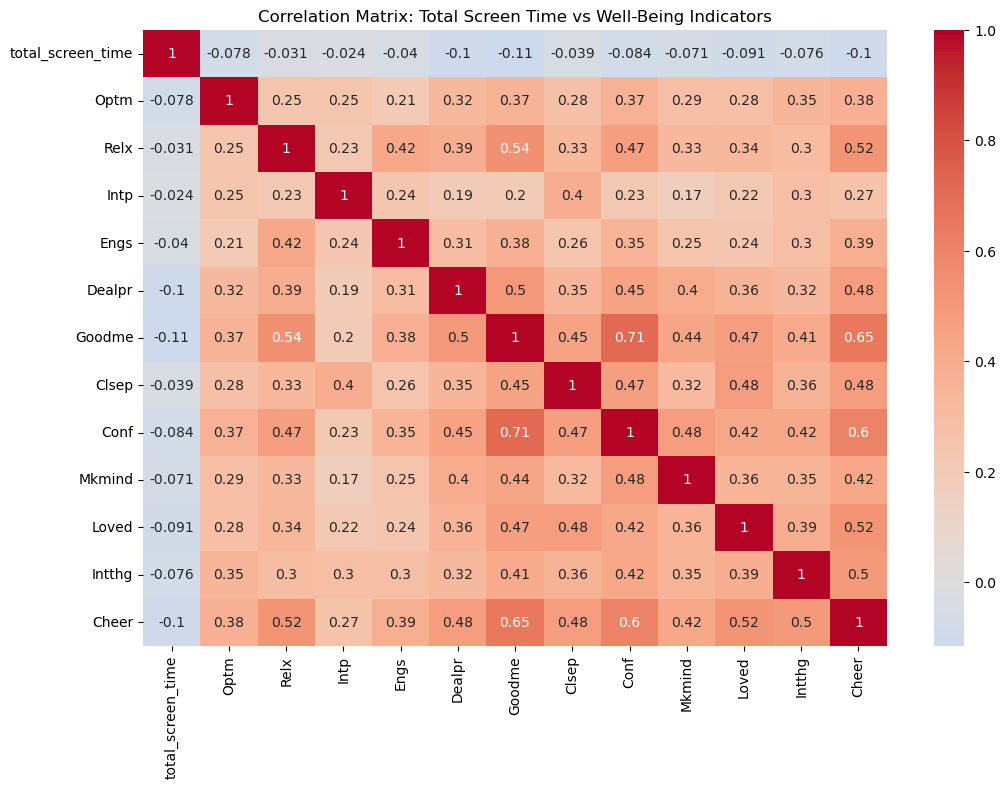

In [26]:
# 5. Correlation Matrix
correlation_matrix = data[['total_screen_time'] + existing_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix: Total Screen Time vs Well-Being Indicators')
plt.show()

In [27]:
# 6. Confusion Matrix
# Create a binary target variable based on the confidence score (e.g., above average)
data['Conf_above_avg'] = (data['Conf'] > data['Conf'].median()).astype(int)

In [28]:
# Features for classification
X = data[['total_screen_time', 'C_we', 'T_wk']]  # Example features
y = data['Conf_above_avg']  # Target variable

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Fit a logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions
y_pred = log_model.predict(X_test)

In [32]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

<Figure size 800x600 with 0 Axes>

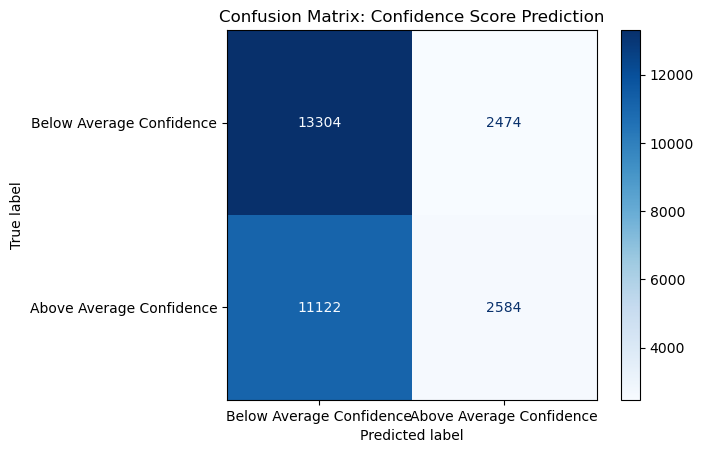

In [33]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Below Average Confidence', 'Above Average Confidence']).plot(cmap='Blues')
plt.title('Confusion Matrix: Confidence Score Prediction')
plt.show()

In [34]:
# 7. T-Test for Differences in Smartphone Usage by Deprivation Status
low_deprivation = data[data['deprived'] == 'Low']['S_wk']
high_deprivation = data[data['deprived'] == 'High']['S_wk']

In [35]:
# Perform the T-test
t_stat, p_value = ttest_ind(low_deprivation, high_deprivation)


In [36]:
print(f'T-Test Results: t-statistic = {t_stat:.4f}, p-value = {p_value:.4f}')
if p_value < 0.05:
    print("Significant difference in smartphone usage between deprivation statuses.")
else:
    print("No significant difference in smartphone usage between deprivation statuses.")

T-Test Results: t-statistic = nan, p-value = nan
No significant difference in smartphone usage between deprivation statuses.


In [37]:
# (Optional) Display the first few rows of the dataset to understand its structure
print(data.head())


        ID  gender  minority  deprived  C_we  C_wk  G_we  G_wk  S_we  S_wk  \
0  1087192       0         0         0   2.0   0.5   0.5   0.5   1.0   0.5   
1  1087195       0         0         0   2.0   1.0   0.0   0.0   3.0   1.0   
2  1087205       0         0         0   1.0   0.5   0.0   0.0   0.5   0.5   
3  1087214       0         0         0   2.0   1.0   0.5   0.0   2.0   1.0   
4  1087222       0         0         0   1.0   3.0   0.0   0.0   2.0   1.0   

   ...  Thcklr  Goodme  Clsep  Conf  Mkmind  Loved  Intthg  Cheer  \
0  ...       4       4      5     4       4      5       4      4   
1  ...       5       3      5     4       4      5       4      4   
2  ...       3       3      4     3       3      3       4      4   
3  ...       4       4      3     5       4      5       4      4   
4  ...       3       4      4     3       5      5       5      5   

   total_screen_time  Conf_above_avg  
0               11.0               1  
1               12.0               1  